<a href="https://colab.research.google.com/github/Jlok17/Data620/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 1:

For your first project, you are asked to:
1. Identify and load a network dataset that has some categorical information available for each node.
2. For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
3. Compare your centrality measures across your categorical groups.

### Data Set:
The Data Set I will be using is about [International Currencies 1890-1910 ](https://eh.net/database/international-currencies-1890-1910/).

A quick overview of this data set is includes 45 different currencies between the period of 1890 and 1910. The reason why this data was collected is that during that period, many national financial centre featured a foreign exchange market where banks traded foreign currency. As these markets were traded against their own domestic currency, this network shows a flow of trade and global market transaction between each nation and their economic power.

### Variables:
* Country_A: The location of the foreign Exchange market
* Country_B: Home country of the currency traded
* Quote1890/Quote1900/Quote1910: Indicates if the market was active for Country B
* Colony: Indicator if Country_A is a colony of Country_B
* Dist: Log distance between cities with foreign exchange markets
* Bitrade: Total trade between Country_A and Country_B in US Dollar(Thousands)
* Gold: If Country_A has a currency convertilbe in gold in 1900
* Debtburden: Ratio of government debt over government revenues in 1900
* Rlong: Secondary Market yield for gold demoninated government debt in 1900
* Rshort1900/Rshort1890: Market rate for 3 month lending
* Rgdp: Log 1900 real GDP
* Rgdpcap: Log real GDP per Capita
* Poldemo: Index of democracy of Polyarchy dataset
* Coverage: Logarithm of the number of currencies traded in Country_A

**1.   Following Variables are Repeated ones from Above but for Country_B**

* Gold_B
* Debtburden_B
* Rlong_B
* Rshort1900_B
* Rshort1890_B
* Rgdp_B
* Rgdpcap_B

### Centrality Measures

* Degree Centrality: Measures the number of direct connections each node has within the network.

* Closeness Centrality: Calculates the shortest paths between all nodes and assigns each node a score based on the sum of its distances to all other nodes.

* Betweenness Centrality: Identifies the nodes that act as "bridges" or intermediaries between other nodes in the network.

* PageRank: Reveals different nodes that possess influence beyond their direct connections.

* EigenCentrality: Examines the extended connections of a node to identify the node's influence over the network.


In [85]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import networkx as nx
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv('https://raw.githubusercontent.com/Jlok17/Data620/main/DataSources/updatedinternationalcurrencies_data.txt', delimiter=',')
df.to_csv('international_currencies_data.csv', index=False)

In [87]:
df.head

<bound method NDFrame.head of      country_A  country_B   quote1890   quote1900   quote1910   colony   \
0          ARG        AUH            0           0           0        0   
1          ARG        AUS            0           0           0        0   
2          ARG        BEL            1           1           1        0   
3          ARG        BRA            0           1           1        0   
4          ARG        CAN            0           0           0        0   
...         ...        ...         ...         ...         ...      ...   
1975       VEN        SGP            0           0           0        0   
1976       VEN        SIA            0           0           0        0   
1977       VEN        SWE            0           0           0        0   
1978       VEN        URY            0           0           0        0   
1979       VEN        USA            0           0           0        0   

         dist    bitrade   gold  debtburden   ... poldemo  coverage  

In [88]:
column_names = df.columns
print(column_names)

Index(['country_A ', 'country_B ', 'quote1890 ', 'quote1900 ', 'quote1910 ',
       'colony ', 'dist ', 'bitrade ', 'gold ', 'debtburden ', 'rlong ',
       'rshort1900 ', 'rshort1890 ', 'rgdp ', 'rgdpcap ', 'poldemo ',
       'coverage ', 'gold_B ', 'debtburden_B ', 'rlong_B ', 'rshort1900_B ',
       'rshort1890_B ', 'rgdp_B ', 'rgdpcap_B ', 'poldemo_B'],
      dtype='object')


In [89]:
country_A_values = df['country_A ']
country_B_values = df['country_B ']
BiTrade_values = df['bitrade ']
print(country_A_values.head(10), country_B_values.head(10),BiTrade_values.head(10))

0    ARG 
1    ARG 
2    ARG 
3    ARG 
4    ARG 
5    ARG 
6    ARG 
7    ARG 
8    ARG 
9    ARG 
Name: country_A , dtype: object 0    AUH 
1    AUS 
2    BEL 
3    BRA 
4    CAN 
5    CEY 
6    CHE 
7    CHL 
8    CHN 
9    COL 
Name: country_B , dtype: object 0      5909.76
1      1258.74
2    127361.20
3     65335.41
4      5073.84
5         0.00
6     16823.72
7      4928.04
8         0.00
9         0.00
Name: bitrade , dtype: float64


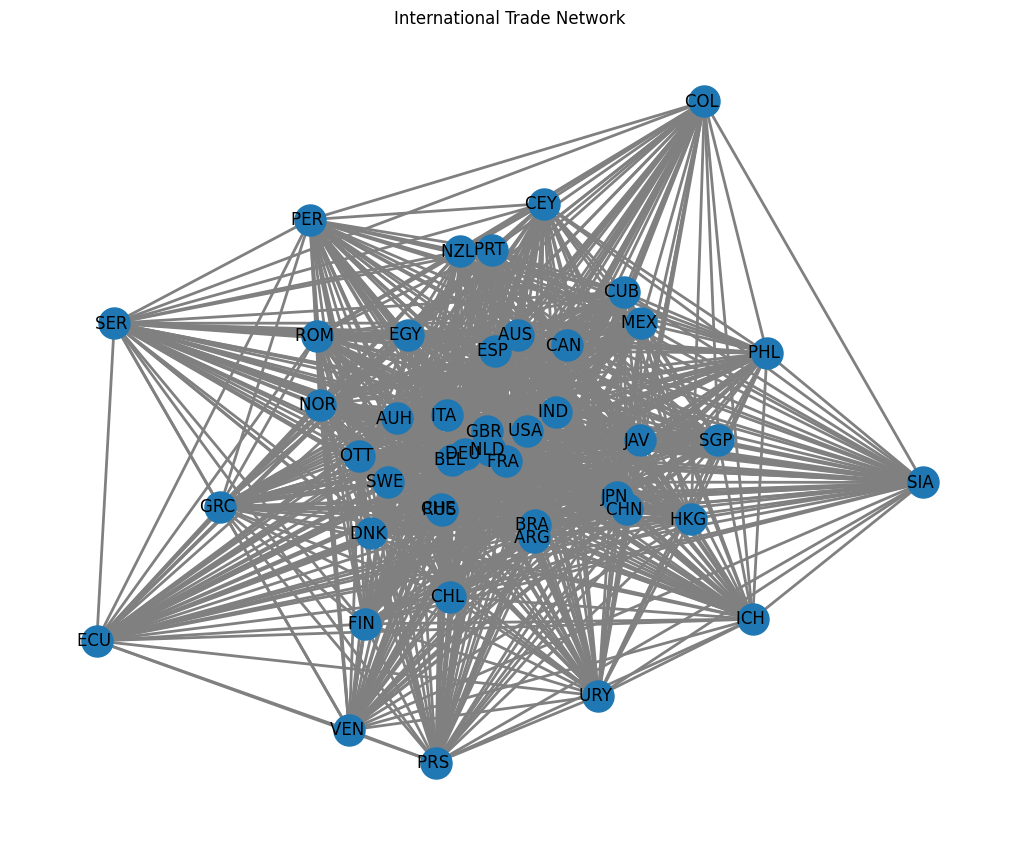

In [90]:
G = nx.Graph()

for row in df.iterrows():
    country1 = row[1]['country_A ']
    country2 = row[1]['country_B ']
    trade = row[1]['bitrade ']

    G.add_edge(country1, country2, weight=trade)

plt.figure(figsize=(10, 8))
pos = nx.fruchterman_reingold_layout(G, k = 0.8)
nx.draw(G, pos, with_labels= True , node_size=500, edge_color='gray', width=2,)
edge_labels = nx.get_edge_attributes(G, 'weight')
plt.title('International Trade Network')
plt.show()

In [91]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 45
Number of edges: 990


In [92]:
countries_set = set()

for row in df.iterrows():
    country1 = row[1]['country_A '].strip()
    country2 = row[1]['country_B '].strip()
    trade = row[1]['bitrade ']

    countries_set.add(country1)
    countries_set.add(country2)
    G.add_edge(country1, country2, weight=trade)

weighted_degrees = dict(G.degree(weight='weight'))
weighted_degrees = {node: round(weighted_degrees[node], 3) for node in weighted_degrees}

sorted_nodes = sorted(weighted_degrees, key=lambda x: weighted_degrees[x], reverse=True)

print("Top 5 Nodes By Weighted Degree:")
count = 0
for node in sorted_nodes:
    if node in countries_set:
        print(f"Node: {node}, Weighted Degree: {weighted_degrees[node]}")
        count += 1
    if count == 5:
        break

print("\nBottom 5 Nodes By Weighted Degree:")
count = 0
for node in reversed(sorted_nodes):
    if node in countries_set:
        print(f"Node: {node}, Weighted Degree: {weighted_degrees[node]}")
        count += 1
    if count == 5:
        break


Top 5 Nodes By Weighted Degree:
Node: GBR, Weighted Degree: 18639174.8
Node: DEU, Weighted Degree: 12142509.995
Node: USA, Weighted Degree: 10843605.263
Node: FRA, Weighted Degree: 7059334.57
Node: NLD, Weighted Degree: 5337034.289

Bottom 5 Nodes By Weighted Degree:
Node: ECU, Weighted Degree: 60419.307
Node: COL, Weighted Degree: 89259.891
Node: SER, Weighted Degree: 107459.797
Node: VEN, Weighted Degree: 117008.901
Node: SIA, Weighted Degree: 137300.225


### Results and Meaning of Weighted Degree:
In general network analysis, the weighted degree of a node is the sum of the node's weighted incident edges. For the Network Graph that I did, the weight of each edge was valued as the "bitrade" value. As stated previously the "bitrade" value is total trade between both countries(nodes) in USD(Thousands). This would then result in which foreign currency holds the most weight between each of the currency given in the dataset during this period of time which is 1890-1910. As seen above the 5 largest degree in order is GBR, DEU, USA, FRA and NLD. While the lowest degree is ECU, COL, SER, VEN, and SIA.
It should be noted that during this time England Colony system was very vast and had approximately 25% of the world trade under their belt. As something that isn't indicated in my report is the emergence of asian economical trade and the rise of the US Economy.

### Further Analysis:



> I decided to look further into the different foreign market and wanted to use if the market was backed by gold currency through the variable "gold" and "gold_B" to see if the total trade value between those different pairs of countries would be different significantly.



In [93]:
edge_data = []

for row in df.iterrows():
    country_A = row[1]['country_A ']
    country_B = row[1]['country_B ']
    gold_A = row[1]['gold ']
    gold_B = row[1]['gold_B ']
    bitrade = row[1]['bitrade ']

    if gold_A and gold_B:
        weight = 3
    elif gold_A or gold_B:
        weight = 2
    else:
        weight = 1

    edge_data.append((country_A, country_B, weight, bitrade))

edge_df = pd.DataFrame(edge_data, columns=['Country_A', 'Country_B', 'Weight', 'Bitrade'])
#Taking out all values of 0 since those Trade Values are unreported
edge_df = edge_df[edge_df['Bitrade'] != 0]

In [94]:
edge_df.head(5)

,Country_A,Country_B,Weight,Bitrade
0,ARG,AUH,3,5909.76
1,ARG,AUS,3,1258.74
2,ARG,BEL,3,127361.20
3,ARG,BRA,2,65335.41
4,ARG,CAN,3,5073.84


In [95]:
summary_stats = edge_df.groupby('Weight')['Bitrade'].describe()

summary_stats.index = ['Weight 1', 'Weight 2', 'Weight 3']

bitrade_weight1 = edge_df.loc[edge_df['Weight'] == 1, 'Bitrade']
bitrade_weight2 = edge_df.loc[edge_df['Weight'] == 2, 'Bitrade']
bitrade_weight3 = edge_df.loc[edge_df['Weight'] == 3, 'Bitrade']

# One-way ANOVA Test
statistic, p_value = stats.f_oneway(bitrade_weight1, bitrade_weight2, bitrade_weight3)

print(summary_stats)
print("             ")
print("ANOVA Results:")
print("Statistic:", statistic)
print("p-value:", p_value)

          count           mean            std        min       25%        50%  \
Weight 1  130.0   26246.422252   76336.653544  126.36000   986.580   4660.740   
Weight 2  526.0   40100.873287   80476.439132   19.44000  1254.933   7858.620   
Weight 3  452.0  158749.403129  380793.433389   65.92667  3858.840  27207.605   

                 75%        max  
Weight 1   17880.350   566778.1  
Weight 2   35119.575   456125.6  
Weight 3  114234.300  3545484.0  
             
ANOVA Results:
Statistic: 31.487619601301876
p-value: 5.0185095280017214e-14


### Statistical Results:

For a statistical test to determine if there was a difference between each type of Weight. I decided to use analysis of variance or ANOVA which compares the different groups by the means and variance. Throughout the test each group is calculated a F-ratio which is then compared group to group to produce a p-value to determine the significance differences between each group. As seen above the statistic or F-Value is 31.487 which results in a p-value of 5.0185e-14. As that p-value is very small there is then strong evidence to reject the null hypothesis that there is no significant difference between the means of the weight groups. This would further suggest that there is a  In other words, the p-value suggests that there is a statistically significant between trade value between pairs and if their respective foreign market is backed by gold.





---
A quick interesting note for summaries of different trade values for each weight is that when a pair of countries are both backed by gold you can see the mean being almost 4 times the mean of if only one country is backed by gold. This further shows us that the countries that are backed by gold are economical superpowers at this period of time.


#### Cleaned up Social Network Graph:

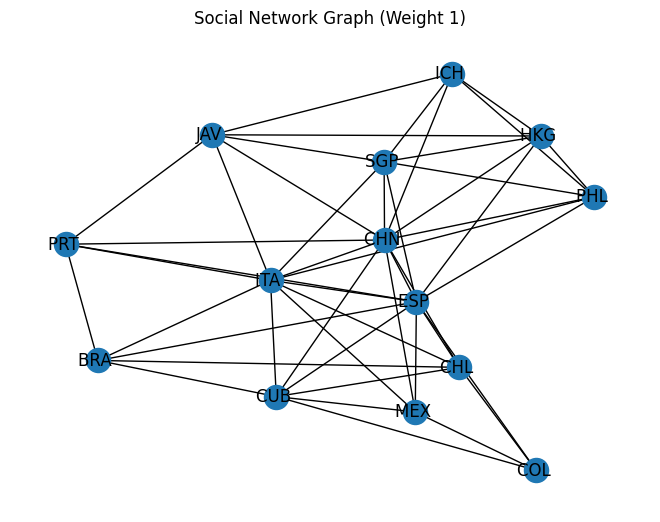


Weight 1:
Top 5 values of degree centrality:
CHN : 0.8461538461538463
ESP : 0.8461538461538463
ITA : 0.7692307692307693
SGP : 0.5384615384615385
CUB : 0.5384615384615385

Bottom 5 values of degree centrality:
COL : 0.3076923076923077
BRA : 0.38461538461538464
ICH : 0.38461538461538464
MEX : 0.38461538461538464
PRT : 0.38461538461538464

Top 5 values of eigenvector centrality:
CHN : 0.3914131186187577
ESP : 0.38330910925841566
ITA : 0.36441133330923176
SGP : 0.279390258296436
CUB : 0.26537127616912776

Bottom 5 values of eigenvector centrality:
COL : 0.15042173741074452
ICH : 0.18951113043991616
BRA : 0.20046144849542796
MEX : 0.21244571010910018
PRT : 0.214284779189536


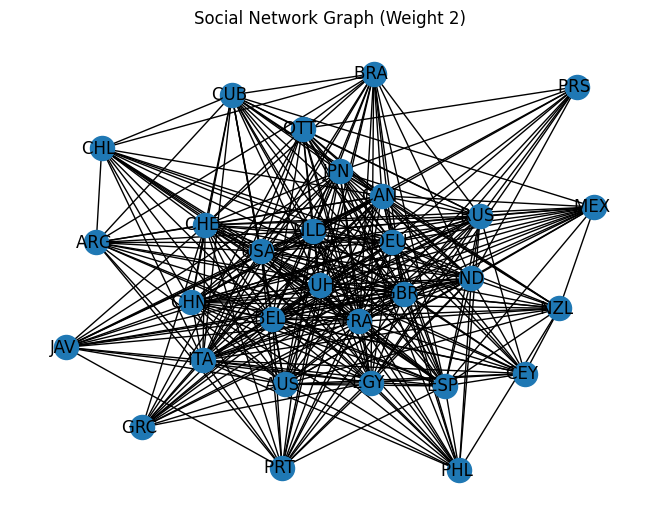


Weight 2:
Top 5 values of degree centrality:
AUH : 1.0
DEU : 1.0
FRA : 1.0
GBR : 1.0
BEL : 0.9655172413793103

Bottom 5 values of degree centrality:
PRS : 0.3793103448275862
GRC : 0.48275862068965514
ARG : 0.5517241379310345
JAV : 0.5517241379310345
CHL : 0.5862068965517241

Top 5 values of eigenvector centrality:
FRA : 0.2214644407573955
GBR : 0.2214644407573955
AUH : 0.22146444075739546
DEU : 0.22146444075739546
ITA : 0.21755462305934276

Bottom 5 values of eigenvector centrality:
PRS : 0.09493652486833919
GRC : 0.12387678435184489
ARG : 0.13681814410182927
JAV : 0.140391753914263
NZL : 0.14293051544092417


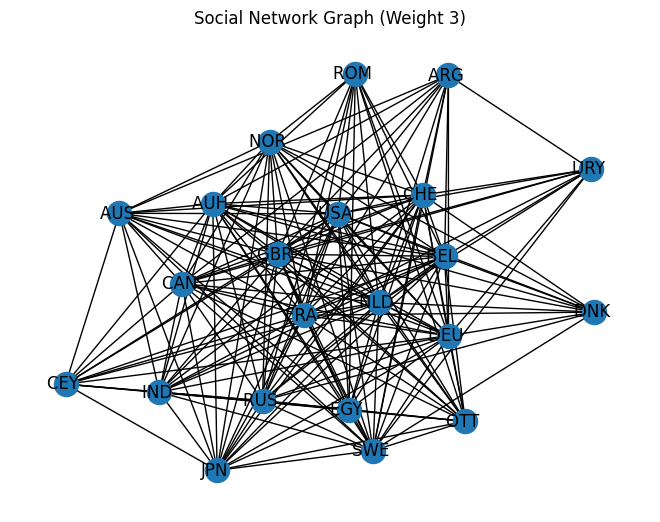


Degree Centrality:
BEL : 1.0
GBR : 1.0
USA : 1.0
FRA : 1.0
DEU : 1.0
NLD : 1.0
CHE : 0.9523809523809523
AUH : 0.9523809523809523
SWE : 0.9047619047619047
RUS : 0.8571428571428571
CAN : 0.8571428571428571
NOR : 0.8095238095238095
IND : 0.8095238095238095
JPN : 0.8095238095238095
AUS : 0.7619047619047619
OTT : 0.7619047619047619
EGY : 0.7619047619047619
CEY : 0.6190476190476191
ROM : 0.5714285714285714
ARG : 0.5714285714285714
DNK : 0.5238095238095237
URY : 0.47619047619047616

Eigenvector Centrality:
NLD : 0.24617196049974885
BEL : 0.2461719604997488
GBR : 0.2461719604997488
USA : 0.2461719604997488
FRA : 0.2461719604997488
DEU : 0.2461719604997488
AUH : 0.23923639399241917
CHE : 0.23722914654589092
SWE : 0.2288770193199177
RUS : 0.22037968491616303
CAN : 0.2193274181816735
IND : 0.21487403411752065
JPN : 0.21487403411752065
NOR : 0.2114470923997887
OTT : 0.20360879091117762
AUS : 0.20048111658282441
EGY : 0.20028976153293115
CEY : 0.16795699398077288
ROM : 0.15686258186848664
ARG : 0.

In [96]:
G = nx.Graph()

for row in edge_df.iterrows():
    country_A = row[1]['Country_A']
    country_B = row[1]['Country_B']
    weight = row[1]['Weight']

    G.add_node(country_A)
    G.add_node(country_B)

    if weight == 1:
        G.add_edge(country_A, country_B, weight=weight)
    elif weight == 2:
        G.add_edge(country_A, country_B, weight=weight)
    elif weight == 3:
        G.add_edge(country_A, country_B, weight=weight)

weights = [1, 2, 3]
for weight in weights:
    subgraph = G.subgraph([n for n, _, w in G.edges(data='weight') if w == weight])
    nx.draw(subgraph, with_labels=True)
    plt.title(f"Social Network Graph (Weight {weight})")
    plt.show()

    if weight == 3:
        degree_centrality = nx.degree_centrality(subgraph)
        eigenvector_centrality = nx.eigenvector_centrality(subgraph)
        sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
        sorted_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

        print("\nDegree Centrality:")
        for node, centrality in sorted_degree_centrality:
            print(f"{node}: {centrality}")

        print("\nEigenvector Centrality:")
        for node, centrality in sorted_eigenvector_centrality:
            print(f"{node}: {centrality}")
    else:

      degree_centrality = nx.degree_centrality(subgraph)
      eigenvector_centrality = nx.eigenvector_centrality(subgraph)
      top_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
      bottom_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1])[:5]
      top_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
      bottom_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1])[:5]

      print(f"\nWeight {weight}:")

      print("Top 5 values of degree centrality:")
      for node, centrality in top_degree_centrality:
          print(f"{node}: {centrality}")

      print("\nBottom 5 values of degree centrality:")
      for node, centrality in bottom_degree_centrality:
          print(f"{node}: {centrality}")

      print("\nTop 5 values of eigenvector centrality:")
      for node, centrality in top_eigenvector_centrality:
          print(f"{node}: {centrality}")

      print("\nBottom 5 values of eigenvector centrality:")
      for node, centrality in bottom_eigenvector_centrality:
          print(f"{node}: {centrality}")

### Results:
1. Neither Currencies are Backed by Gold:

CHN and ESP has the highest degree centrality value at 0.84615 however CHN has a higher eigenvector centrality value compared to ESP at 0.39141 to 0.38331 respectively. For the bottom 5 values it’s interesting since COL has the lowest degree centrality and eigenvector value but the next 4 all have the same degree centrality value but all different eigenvector values. This is going from the bottom starting with ICH, BRA, MEX, PRT.

2. Only One Currency is Backed by Gold:

The highest values of degree centrality and eigenvector centrality values would be AUH, DEH, FRA, and GBR. The values are at 1.0 and 0.22146. This doesn’t surprise us as we know that these main foreign powers had a lot of different colonies spread out throughout the world. This would allow them to trade with a diverse set of markets that are still developing. The lowest market network values is coming from PRS , which from historic point of view we know that the Persian empire was slowing decreasing in economical power during this time.

3. Both Currencies are Backed by Gold:

For both degree centrality and eigenvector centrality values: BEL, GBR, USA, FRA, DEU, and NLD have the highest values at 1.0 and 0.24617 respectively. This means from a degree centrality standpoint these foreign markets are connected to every market that has currency backed by gold. The lowest values are coming from URY at 0.47619 which means it’s only connected to less than half of the foreign markets in this network.

#### References:

* Flandreau, M. and C. Jobst (2005), ‘The ties that divide: a network analysis of the international monetary system 1890–1910’, Journal of Economic History, vol. 65(4).

* Britannica, The Editors of Encyclopaedia. "British Empire". Encyclopedia Britannica, 27 Apr. 2023, https://www.britannica.com/place/British-Empire. Accessed 14 June 2023.

* The Gilder Lehrman Institute of american history advanced placement united states history study guide. The Rise of Industrial America, 1877-1900 | AP US History Study Guide from The Gilder Lehrman Institute of American History. (2011, November 29). https://ap.gilderlehrman.org/essays/rise-industrial-america-1877-1900

* Ito, Takatoshi, and David E. Weinstein. “Japan and the Asian Economies: A ‘Miracle’ in Transition.” Brookings Papers on Economic Activity, vol. 1996, no. 2, 1996, pp. 205–72. JSTOR, https://doi.org/10.2307/2534622. Accessed 14 June 2023.